In [29]:
# Setup and File Path
import matplotlib.pyplot as plt

# Define the file path 
file_path = 'data/dna_raw_complicated.txt'

print(f"File path set to: {file_path}")

# Read and open the file
with open(file_path, 'r') as file:
    dna_data = file.readlines()
    print(dna_data)

File path set to: data/dna_raw_complicated.txt
['>seq1\n', 'cGTAaccaataaaaaaacaagcttaacctaattc\n', '>seq2\n', 'agcttagTTTGGatctggccgggg\n', '>seq3\n', 'gcggatttactcCCCCCAAAAANNaggggagagcccagataaatggagtctgtgcgtccaca\n', 'gaattcgcacca\n', 'AATAAAACCTCACCCAT\n', 'agagcccagaatttactcCCC\n', '>seq4\n', 'gcggatttactcaggggagagcccagGGataaatggagtctgtgcgtccaca\n', 'gaattcgcacca']


In [30]:
# Import Library for efficient counting.
from collections import Counter

# Define a function
def dna_complicated(dna_data): 
    # An empty list to store the final dictionaries.
    final_result = []
    # Stores the ID of the current sequence being collected (e.g., 'seq1').      
    seq_id = None
    # A temporary list to hold all the DNA lines for the current sequence.
    current_sequence_lines = [] 

    # --- Main Loop ---
    for line in dna_data:
        clean_line = line.strip()
        # Checks if the line is a new sequence header
        if clean_line.startswith('>'):
            # Process the previously collected sequence
            if seq_id is not None:
                # It joins the fragments in current_sequence_lines, converts to lowercase, and uses Counter() to instantly count the letters.
                sequence = "".join(current_sequence_lines).lower()
                frequency_dict = Counter(sequence) 
                
                print("\n" + "="*50)
                print(f"Sequence ID: {seq_id}")
                print(f"Dictionary: {dict(frequency_dict)}")
                final_result.append({'id': seq_id, 'counts': dict(frequency_dict)})

            # Start the new sequence
            seq_id = clean_line[1:]
            current_sequence_lines = []   
        
    # Collecting Data (If the line is not a header, it's a piece of DNA.)
        elif clean_line:
            current_sequence_lines.append(clean_line)

    # --- Final Cleanup for the last sequence in the file ---
    #A final block of code outside the loop runs the counting logic one last time to make sure this final sequence is also saved.
    if seq_id is not None and current_sequence_lines:
        sequence = "".join(current_sequence_lines).lower()
        frequency_dict = Counter(sequence)
        
        print("\n" + "="*50)
        print(f"Sequence ID: {seq_id}")
        print(f"Dictionary: {dict(frequency_dict)}")
        # Stores the final ID and counts dictionary for this sequence in the main results list.
        final_result.append({'id': seq_id, 'counts': dict(frequency_dict)})

    return final_result

# --- Call the function ---
final_result = dna_complicated(dna_data) 
print("\n" + "="*50)


Sequence ID: seq1
Dictionary: {'c': 8, 'g': 2, 't': 7, 'a': 17}

Sequence ID: seq2
Dictionary: {'a': 3, 'g': 10, 'c': 4, 't': 7}

Sequence ID: seq3
Dictionary: {'g': 21, 'c': 34, 'a': 36, 't': 19, 'n': 2}

Sequence ID: seq4
Dictionary: {'g': 20, 'c': 15, 'a': 17, 't': 12}



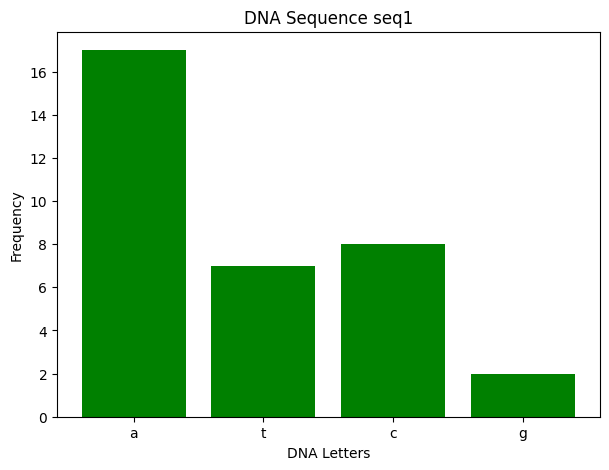

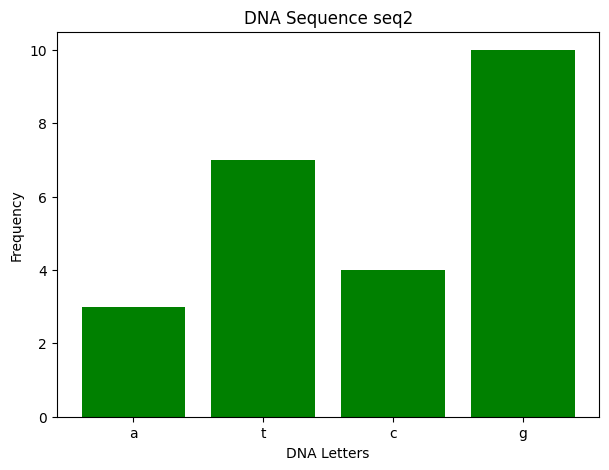

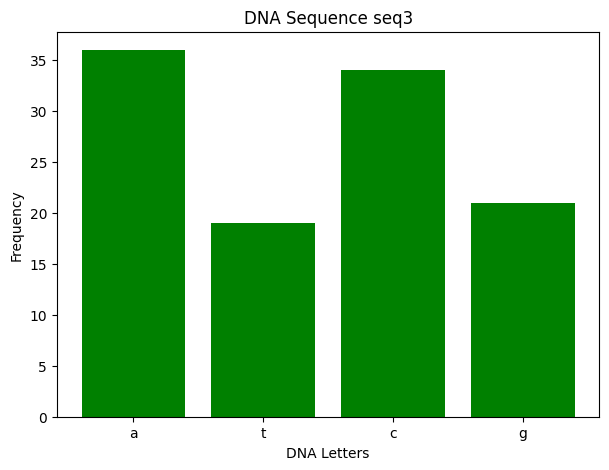

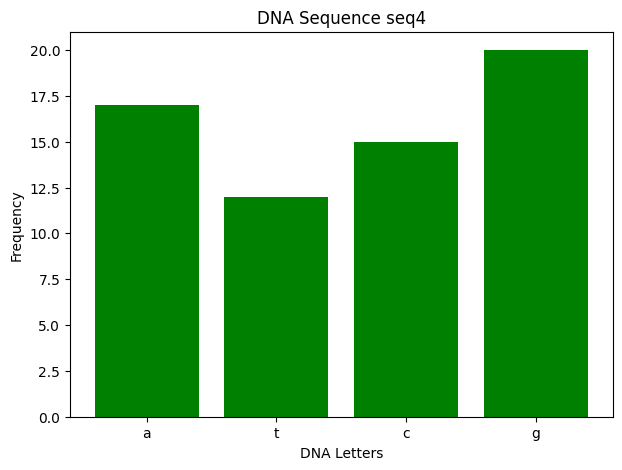

In [31]:
# Define the order of letters for a consistent graph axis
dna_letters = ['a', 't', 'c', 'g']

# Iterate over the list of sequence data dictionaries
for result in final_result:
    seq_id = result['id']
    frequency_dict = result['counts']
    
    # Extract frequencies in the correct order (e.g., a, t, c, g)
    frequencies = [frequency_dict.get(letter, 0) for letter in dna_letters]
    
    # Create a new figure for each graph 
    plt.figure(figsize=(7, 5))
    
    # Create the bar chart
    plt.bar(dna_letters, frequencies, color='green')
    
    # Add labels and a title
    plt.title(f'DNA Sequence {seq_id}')
    plt.xlabel('DNA Letters')
    plt.ylabel('Frequency')
    
    # Display the chart
    plt.show()